In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import os
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, LSTM, InputLayer, SpatialDropout1D, Bidirectional
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping
import matplotlib.pyplot as plt
from tensorflow.math import confusion_matrix

## Load data

In [2]:
def to_3D(input_data):
    print("Before reshaping: ", input_data.shape)
    X = []
    for row in input_data: 
        X.append([row])
    X = np.asarray(X)
    print("After reshaping: ", X.shape)
    return X

In [3]:
features = np.loadtxt('data/mfcc_mel/features.txt')
targets = np.loadtxt('data/mfcc_mel/targets.txt')
features_3D = to_3D(features)

Before reshaping:  (7442, 145)
After reshaping:  (7442, 1, 145)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(features_3D, targets, test_size=0.2, random_state=1)

## Model

In [5]:
def create_model():
    model = Sequential()
    model.add(InputLayer(input_shape=(1, 145)))
    model.add(Bidirectional(LSTM(256, dropout=0.2, recurrent_dropout=0.2, return_sequences = True)))
    model.add(SpatialDropout1D(0.1))
    model.add(Bidirectional(LSTM(256, dropout=0.2, recurrent_dropout=0.2, return_sequences = True)))
    model.add(Bidirectional(LSTM(256, dropout=0.2, recurrent_dropout=0.2, return_sequences = True)))
    model.add(Bidirectional(LSTM(256, dropout=0.2, recurrent_dropout=0.1)))
    model.add(Dense(6, activation='softmax'))
    opt = Adam(learning_rate=0.00001)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt)
    return model

In [6]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 1, 512)            823296    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 1, 512)            0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 1, 512)            1574912   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 1, 512)            1574912   
_________________________________________________________________
bidirectional_3 (Bidirection (None, 512)               1574912   
_________________________________________________________________
dense (Dense)                (None, 6)                 3078      
Total params: 5,551,110
Trainable params: 5,551,110
Non-trainable params: 0
______________________________________________

In [7]:
earlystopping = EarlyStopping(patience=10,restore_best_weights=True)
checkpoint_path = "ckpts/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True, verbose=1)
batch_size = 32
epochs = 150

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
         validation_split=0.15,
         callbacks=[cp_callback])

Epoch 1/150
159/159 [==============================] - 27s 81ms/step - loss: 1.7915 - accuracy: 0.1725 - val_loss: 1.7904 - val_accuracy: 0.1736

Epoch 00001: saving model to ckpts/cp.ckpt
Epoch 2/150
159/159 [==============================] - 11s 68ms/step - loss: 1.7909 - accuracy: 0.1820 - val_loss: 1.7889 - val_accuracy: 0.1848

Epoch 00002: saving model to ckpts/cp.ckpt
Epoch 3/150
159/159 [==============================] - 11s 68ms/step - loss: 1.7900 - accuracy: 0.1898 - val_loss: 1.7868 - val_accuracy: 0.2430

Epoch 00003: saving model to ckpts/cp.ckpt
Epoch 4/150
159/159 [==============================] - 11s 68ms/step - loss: 1.7885 - accuracy: 0.2028 - val_loss: 1.7836 - val_accuracy: 0.2172

Epoch 00004: saving model to ckpts/cp.ckpt
Epoch 5/150
159/159 [==============================] - 12s 75ms/step - loss: 1.7861 - accuracy: 0.2343 - val_loss: 1.7773 - val_accuracy: 0.2721

Epoch 00005: saving model to ckpts/cp.ckpt
Epoch 6/150
159/159 [==============================] - 

159/159 [==============================] - 10s 62ms/step - loss: 1.5119 - accuracy: 0.3646 - val_loss: 1.5356 - val_accuracy: 0.3326

Epoch 00044: saving model to ckpts/cp.ckpt
Epoch 45/150
159/159 [==============================] - 10s 66ms/step - loss: 1.5033 - accuracy: 0.3658 - val_loss: 1.5325 - val_accuracy: 0.3371

Epoch 00045: saving model to ckpts/cp.ckpt
Epoch 46/150
159/159 [==============================] - 13s 84ms/step - loss: 1.5212 - accuracy: 0.3569 - val_loss: 1.5317 - val_accuracy: 0.3326

Epoch 00046: saving model to ckpts/cp.ckpt
Epoch 47/150
159/159 [==============================] - 11s 70ms/step - loss: 1.5141 - accuracy: 0.3593 - val_loss: 1.5299 - val_accuracy: 0.3359

Epoch 00047: saving model to ckpts/cp.ckpt
Epoch 48/150
159/159 [==============================] - 13s 83ms/step - loss: 1.5180 - accuracy: 0.3558 - val_loss: 1.5327 - val_accuracy: 0.3315

Epoch 00048: saving model to ckpts/cp.ckpt
Epoch 49/150
159/159 [==============================] - 11s 69m

159/159 [==============================] - 11s 70ms/step - loss: 1.4855 - accuracy: 0.3637 - val_loss: 1.5149 - val_accuracy: 0.3516

Epoch 00087: saving model to ckpts/cp.ckpt
Epoch 88/150
159/159 [==============================] - 10s 65ms/step - loss: 1.4854 - accuracy: 0.3708 - val_loss: 1.5168 - val_accuracy: 0.3516

Epoch 00088: saving model to ckpts/cp.ckpt
Epoch 89/150
159/159 [==============================] - 10s 62ms/step - loss: 1.4924 - accuracy: 0.3650 - val_loss: 1.5153 - val_accuracy: 0.3516

Epoch 00089: saving model to ckpts/cp.ckpt
Epoch 90/150
159/159 [==============================] - 12s 73ms/step - loss: 1.4877 - accuracy: 0.3673 - val_loss: 1.5157 - val_accuracy: 0.3460

Epoch 00090: saving model to ckpts/cp.ckpt
Epoch 91/150
159/159 [==============================] - 13s 80ms/step - loss: 1.4853 - accuracy: 0.3631 - val_loss: 1.5150 - val_accuracy: 0.3527

Epoch 00091: saving model to ckpts/cp.ckpt
Epoch 92/150
159/159 [==============================] - 11s 71m

159/159 [==============================] - 12s 74ms/step - loss: 1.4761 - accuracy: 0.3807 - val_loss: 1.5056 - val_accuracy: 0.3572

Epoch 00130: saving model to ckpts/cp.ckpt
Epoch 131/150
159/159 [==============================] - 11s 69ms/step - loss: 1.4552 - accuracy: 0.3812 - val_loss: 1.5057 - val_accuracy: 0.3572

Epoch 00131: saving model to ckpts/cp.ckpt
Epoch 132/150
159/159 [==============================] - 11s 69ms/step - loss: 1.4694 - accuracy: 0.3842 - val_loss: 1.5020 - val_accuracy: 0.3595

Epoch 00132: saving model to ckpts/cp.ckpt
Epoch 133/150
159/159 [==============================] - 11s 70ms/step - loss: 1.4678 - accuracy: 0.3746 - val_loss: 1.5012 - val_accuracy: 0.3572

Epoch 00133: saving model to ckpts/cp.ckpt
Epoch 134/150
159/159 [==============================] - 14s 88ms/step - loss: 1.4596 - accuracy: 0.3920 - val_loss: 1.4989 - val_accuracy: 0.3561

Epoch 00134: saving model to ckpts/cp.ckpt
Epoch 135/150
159/159 [==============================] - 13

## Metrics

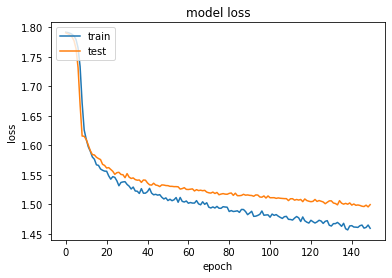

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

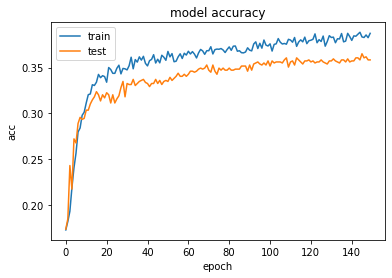

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [10]:
accuracy = model.evaluate(X_test, y_test)
print('Loss: {:0.3f}\nAccuracy: {:0.3f}'.format(accuracy[0],accuracy[1]))

47/47 [==============================] - 1s 12ms/step - loss: 1.4196 - accuracy: 0.4359
Loss: 1.420
Accuracy: 0.436


In [11]:
prediction = model.predict_classes(X_test)
label = np.where(y_test)[1]

/usr/local/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [12]:
confusion = confusion_matrix(labels=label, predictions=prediction, num_classes=6)

In [13]:
cate = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad']

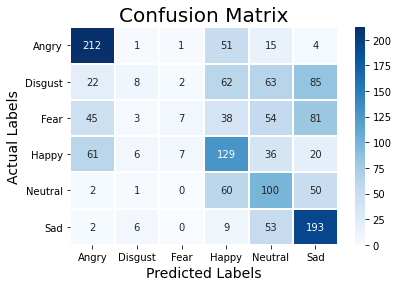

In [14]:
cm = pd.DataFrame(confusion.numpy(), index = [i for i in cate] , columns = [i for i in cate])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()